#### Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt

#### Data generation

In [12]:
import csv
filename = 'Experiment.csv'
with open(filename) as csvdatei:
    csv_reader_object = csv.reader(csvdatei)
    row = list(csv_reader_object)
print('Half pole length : ', row[15])
print('Recorded data: ', row[27])

data = np.genfromtxt(filename, skip_header=28, delimiter=',')

Half pole length :  ['# L: 0.1975']
Recorded data:  ['time', 'angle', 'angleD', 'angleDD', 'angle_cos', 'angle_sin', 'position', 'positionD', 'positionDD', 'Q', 'u', 'target_position']


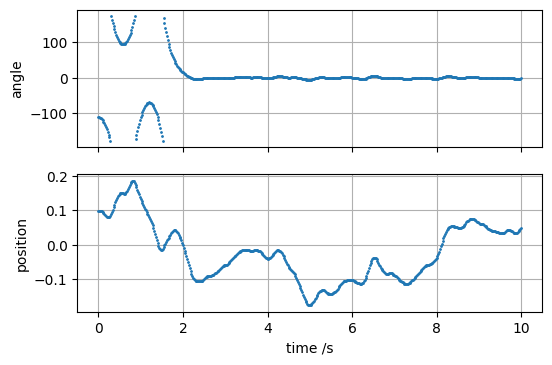

In [13]:
time = data[:,0]
angle = data[:,1]*180/np.pi
position = data[:,6]

fig, (ax1, ax2) = plt.subplots(2, sharex=True, dpi =100)
ax1.plot(time, angle,'.',markersize=2)
ax1.set(ylabel='angle')
ax1.grid(True)

ax2.plot(time,position,'.',markersize=2, label='')
ax2.set(ylabel='position', xlabel='time /s')
ax2.grid(True)

### Fourier Analysis

In [3]:
from scipy.fft import rfft, rfftfreq
L = 10
x = np.arange(0,10, step = 0.1)
sine = np.sin(x*2*np.pi/L)
fft = rfft(sine)
freq = rfftfreq(len(sine), 0.1)
max = np.abs(fft) > 10
peaks = freq[max]
print('Dominant Period:', 1/peaks)

plt.plot(x, sine)
plt.show()
plt.figure()
plt.plot(freq, np.abs(fft),'.')